In [36]:
import json
import pandas as pd
from collections import Counter
from pylab import plot, loglog
import re

%matplotlib inline

def read_one(line, _split):
    if _split:
        k, v = line.split('\t')
        d = json.loads(v)
        d["key"] = ":".join(k.split('/')[0:2])
    else:
        d = json.loads(line)
    return d


def read_tweets(filename, _split=True):
    X = {"key": [], "text": []}
    with open(filename) as f:
        lineno = 0
        while True:
            lineno += 1
            if lineno % 50000 == 1:
                print("*** lineno: {0}".format(lineno))
        
            line = f.readline()
            if line.startswith('RT'):
                continue
            
            if len(line) == 0:
                break
                
            d = read_one(line, _split)
            X["key"].append(d.get("key", None))
            X["text"].append(d["text"])
        
    df = pd.DataFrame(X)
    return df


def read_gutenberg(filename):
    with open(filename) as f:
        wlist = [line for line in f.readlines() if line[0] not in ('#', '\n')]
        return pd.DataFrame({"text": wlist})


def normalize_and_tokenize(s):
    s = s.lower()
    s = re.sub(r"""\|\.|,|:|;|\¡|\!|\¿|\?|'|"|…""", " ", s, re.X)
    return s.split()


def count_voc(df):
    full = Counter()
    for x in df.text.values:
        words = []
        for w in normalize_and_tokenize(x):
            words.append(w)

        full.update(words)

    return full


def heaps(df):
    vocab = set()
    n = 0
    
    X = {"vocab": [], "n": []}
    for x in df.text.values:
        for w in normalize_and_tokenize(x):
            vocab.add(w)
        n += 1
        X["vocab"].append(len(vocab))
        X["n"].append(n)
            

    return pd.DataFrame(X)


# Ley de Zipf

$P(n) \simeq \frac{1}{n^\alpha}$

- Aplica para un lenguaje natural
- $\alpha$ tiende a una constante para cada lenguaje, e.g., para español es diferente que para inglés
- ¿Qué pasa en textos con grandes cantidades de variantes léxicas?

## Ejemplo para libros en inglés

In [37]:
from nltk.book import *

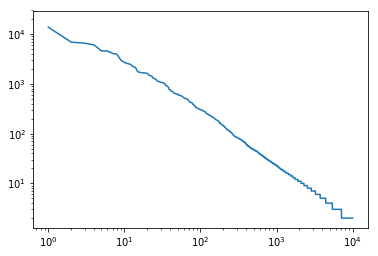

In [7]:
loglog(sorted(text1.vocab().values(), reverse=1)[:10000])

## Ejemplo para libros en español

In [8]:
C = read_gutenberg("celestina.txt")

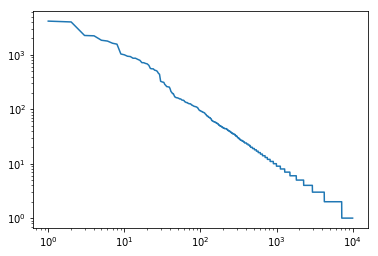

In [11]:
common_cel = count_voc(C).most_common(10000)
loglog([c[1] for c in common_cel])

## Ejemplo para tweets en español

In [38]:
X = read_tweets("tweets/data/T_180501-timelines-klass")
#X = read_tweets("tweets/data/T")

*** lineno: 1
*** lineno: 50001
*** lineno: 100001
*** lineno: 150001
*** lineno: 200001
*** lineno: 250001


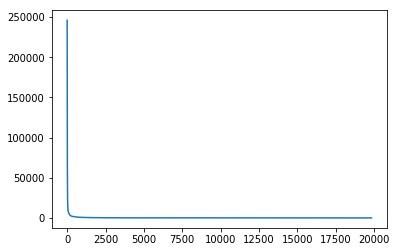

In [91]:
common = count_voc(X).most_common()
plot([c[1] for c in common])

## Ejemplo para un lenguaje sintético

In [15]:
M = read_tweets("tweets/model.pan18-es-train-images.json", False)

*** lineno: 1


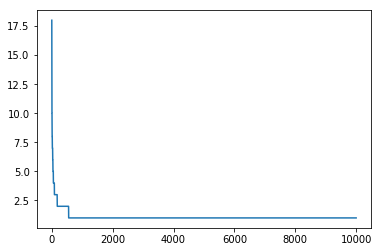

In [17]:
common_ = count_voc(M).most_common(10000)
plot([c[1] for c in common_])

## Calculando los parámetros de la distribución a partir de pequeña muestra de los datos

[    1     2     3 ..., 19824 19825 19826]
[246006 208663 179847 ...,     28     28     28]
[ -5.23355852e+01   2.46006000e+05] [ inf  inf]


/Users/sadit/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


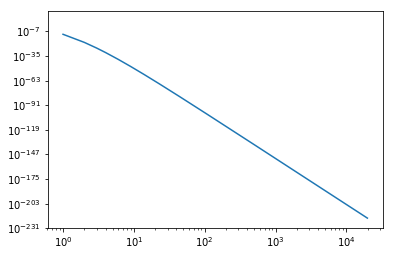

In [105]:
from scipy.optimize import curve_fit
import numpy as np

rank = np.array(range(1, len(common)+1))

def zipf(rank, a, b):
    p = b * (rank ** a)
    return p

freq = np.array([c[1] for c in common])
#freq.shape = (1, -1)
print(rank)
print(freq)
params, pcov = curve_fit(zipf, rank[:100], freq[:100])
perr = np.sqrt(np.diag(pcov))
print(params, perr)

loglog(zipf(rank, *params))

# Ley de Heaps

$\sigma \simeq n^\beta$, $0 < \beta < 1$

## Ejemplo ley de Heaps en inglés

In [18]:
moby = read_gutenberg("moby.txt")

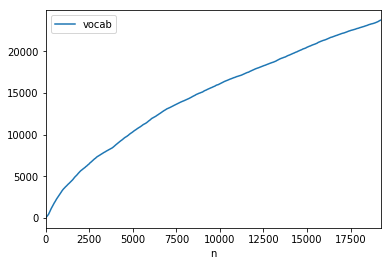

In [19]:
hmoby = heaps(moby)
hmoby.plot(x='n', y='vocab')

## Ejemplo ley de Heaps en español

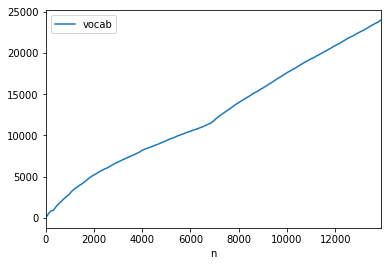

In [20]:
hcel = heaps(C)
hcel.plot(x='n', y='vocab')

## Ejemplo de la ley de Heaps en Tweets

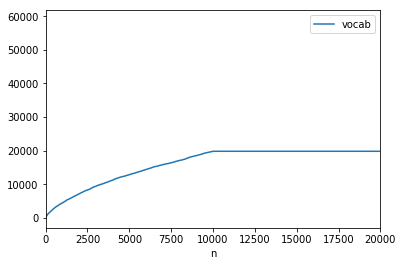

In [35]:
tcel = heaps(X)
tcel.plot(x='n', y='vocab', xlim=(0,20000))

## Ejemplo de la ley de Heaps para un lenguaje sintético

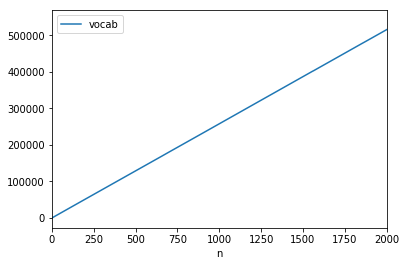

In [22]:
imgcel = heaps(M)
imgcel.plot(x='n', y='vocab', xlim=(0,2000))

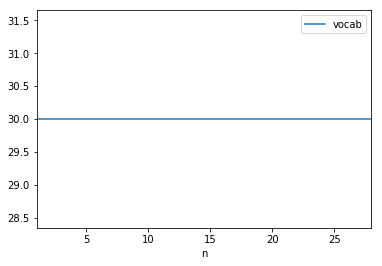

In [31]:
#XX = heaps(X[X.key == "100049584:Antonio_M_Shaw"])
#XX = heaps(X[X.key == "1000738770:LUGARDAOLGUIN"])
XX = heaps(X[X.key == "1120817600:PikiloMx"])

#plot([c[1] for c in XX.most_common(10000)])
XX.plot(x='n', y='vocab')

# Posibles usos

In [30]:
X[X.key == "100011689:ohsijuan23"]

,key,text
9,100011689:ohsijuan23,RT @craviotocesar: .@RicardoAnayaC prepara un ...
10,100011689:ohsijuan23,"RT @lovrega: Mientes @ferbelaunzaran, las pala..."
11,100011689:ohsijuan23,RT @mario_delgado1: Ya sabemos que son lo mism...
12,100011689:ohsijuan23,"RT @virichmk: Podrán pelearse, podrán simular,..."
13,100011689:ohsijuan23,RT @PestilenciaMX: Ricardo Canalla @RicardoAna...
14,100011689:ohsijuan23,"RT @MEXZITO: #PRIANaya En rigor, es injusto de..."
15,100011689:ohsijuan23,RT @abrahamendieta: Semana negra para Ricardo ...
16,100011689:ohsijuan23,RT @galvanochoa: Pues no que quería darle tanq...
10009,100011689:ohsijuan23,RT @craviotocesar: .@RicardoAnayaC prepara un ...
10010,100011689:ohsijuan23,"RT @lovrega: Mientes @ferbelaunzaran, las pala..."


In [24]:
X.groupby("key").count()

,text
key,
1000024855:gracoramiro,29
1000040929:JorgeJolusf,174
100007587:Joseph_Starks,29
100010904:EdmundoRD,29
100011689:ohsijuan23,232
1000120309:learjet28,29
100013025:PolitologoOscar,116
1000143108:BtoVqz,29
1000143781:albertolincoln1,29
